In [89]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
current_dir = os.getcwd()
csv_file = f'{current_dir}/spotify-2023.csv'
try:
    df = pd.read_csv(csv_file, encoding='utf-8-sig')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(csv_file, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


In [80]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


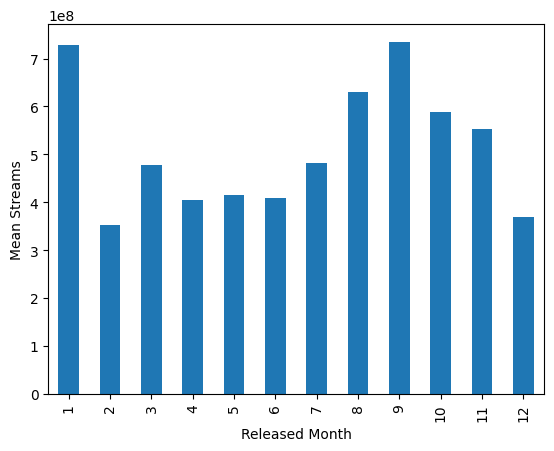

In [91]:
# create a barplot that shows the mean streams for each month
# Convert 'streams' column to numeric, coerce errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with NaN values in 'streams' column
df.dropna(subset=['streams'], inplace=True)

# Plot the mean streams for each month
df.groupby('released_month')['streams'].mean().plot(kind='bar')
plt.xlabel('Released Month')
plt.ylabel('Mean Streams')
plt.show()


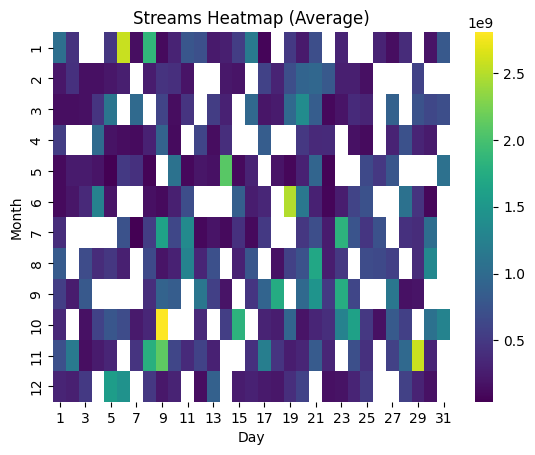

In [92]:
# Pivot the DataFrame to have 'day' as columns, 'month' as index, and 'streams' as values
heatmap_data = df.pivot_table(index='released_month', columns='released_day', values='streams', aggfunc='mean')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='viridis')  # You can choose any colormap you prefer
plt.title('Streams Heatmap (Average)')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()


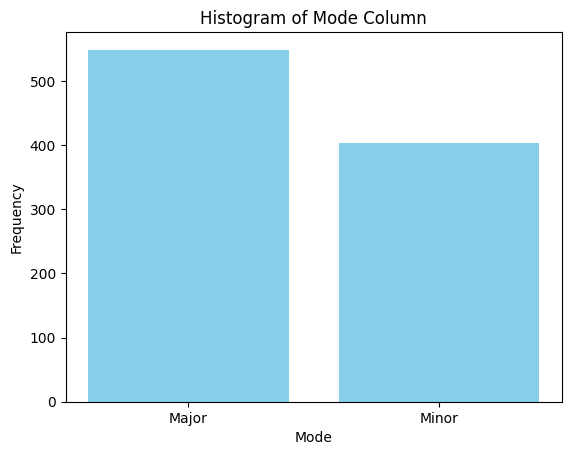

In [93]:
# Count the occurrences of each unique value in the "mode" column
value_counts = df['mode'].value_counts()

# Plotting histogram
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Mode')
plt.ylabel('Frequency')
plt.title('Histogram of Mode Column')
plt.show()

In [94]:
# show the rows that have empty values in any column
df[df.isnull().any(axis=1)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,NaN,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,174,F#,Minor,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,1.231224e+08,22,...,120,NaN,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,2.655488e+08,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,...,137,NaN,Major,74,71,89,24,61,15,5
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,1.404303e+08,0,...,125,D#,Minor,49,13,74,0,0,9,4
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,...,110,NaN,Major,48,15,31,80,22,12,4


Missing Values

In [101]:
missing_values = df.isnull().mean()
missing_values

track_name              0.0
artist(s)_name          0.0
artist_count            0.0
released_year           0.0
released_month          0.0
released_day            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
dtype: float64

In [102]:
# replace all NaN values in the 'key' column with 'Unknown'
df['key'] = df['key'].fillna('Unknown')
# replace all Nan values in the 'in_shazam_charts' column with 0
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [103]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [104]:
# show the percentage of 'Unknown' values in the 'mode' column
unknown_percentage = df['in_shazam_charts'].value_counts(normalize=True)[0]
unknown_percentage

0.41281512605042014

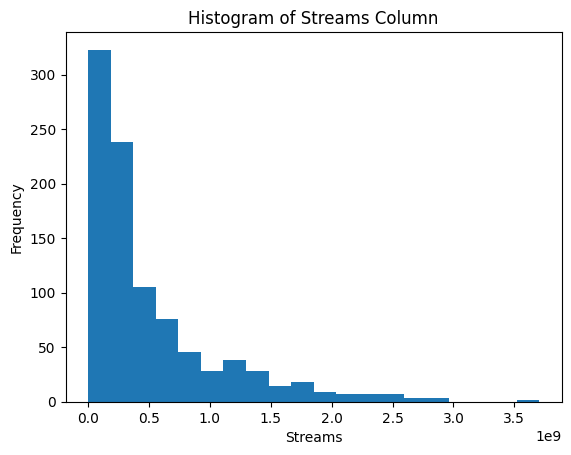

In [105]:
# show the histogram of the 'streams' column
df['streams'] = pd.to_numeric(df['streams'])
df['streams'].plot(kind='hist', bins=20)
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Streams Column')
plt.show()

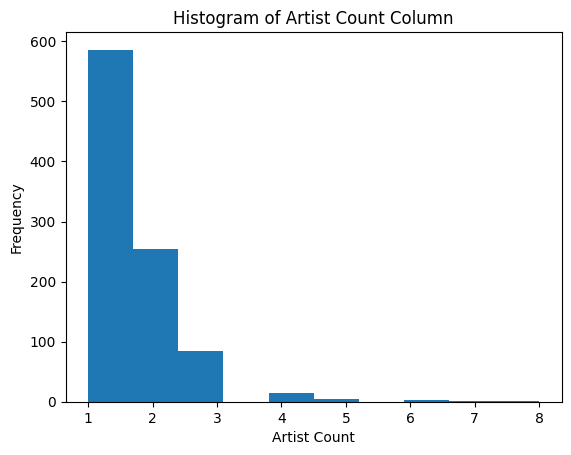

In [106]:
# show the histogram of the 'artist_count' column
df['artist_count'] = pd.to_numeric(df['artist_count'])
df['artist_count'].plot(kind='hist')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.title('Histogram of Artist Count Column')
plt.show()

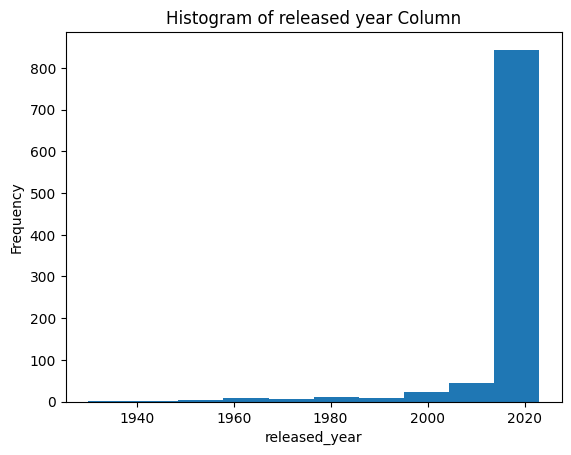

In [107]:
# show the histogram of the 'released_year' column
df['released_year'] = pd.to_numeric(df['released_year'])
df['released_year'].plot(kind='hist')
plt.xlabel('released_year')
plt.ylabel('Frequency')
plt.title('Histogram of released year Column')
plt.show()

Does the first letter of the track name affect the popularity of the track?

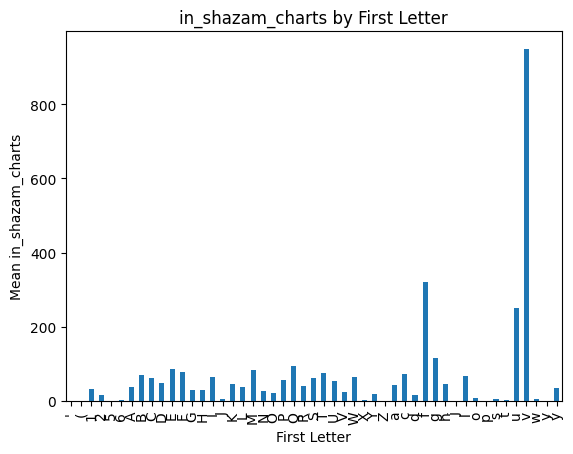

In [108]:
# show the relation between the first latter of the 'track_name' column and the 'in_shazam_charts' column
df['first_letter'] = df['track_name'].str[0]
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'])
df.groupby('first_letter')['in_shazam_charts'].mean().plot(kind='bar')
plt.xlabel('First Letter')
plt.ylabel('Mean in_shazam_charts')
plt.title('in_shazam_charts by First Letter')
plt.show()

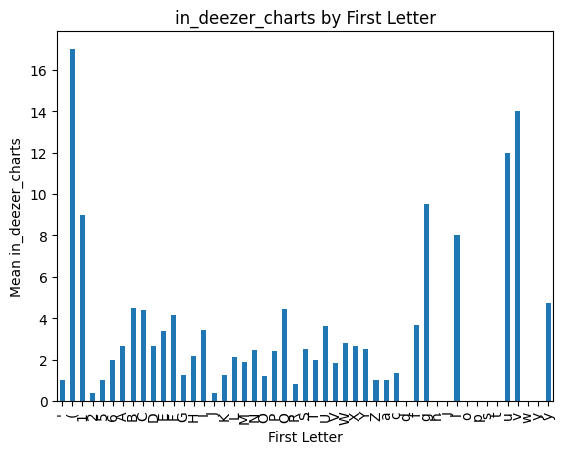

In [109]:
# show the relation between the first latter of the 'track_name' column and the 'in_shazam_charts' column
df['first_letter'] = df['track_name'].str[0]
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'])
df.groupby('first_letter')['in_deezer_charts'].mean().plot(kind='bar')
plt.xlabel('First Letter')
plt.ylabel('Mean in_deezer_charts')
plt.title('in_deezer_charts by First Letter')
plt.show()

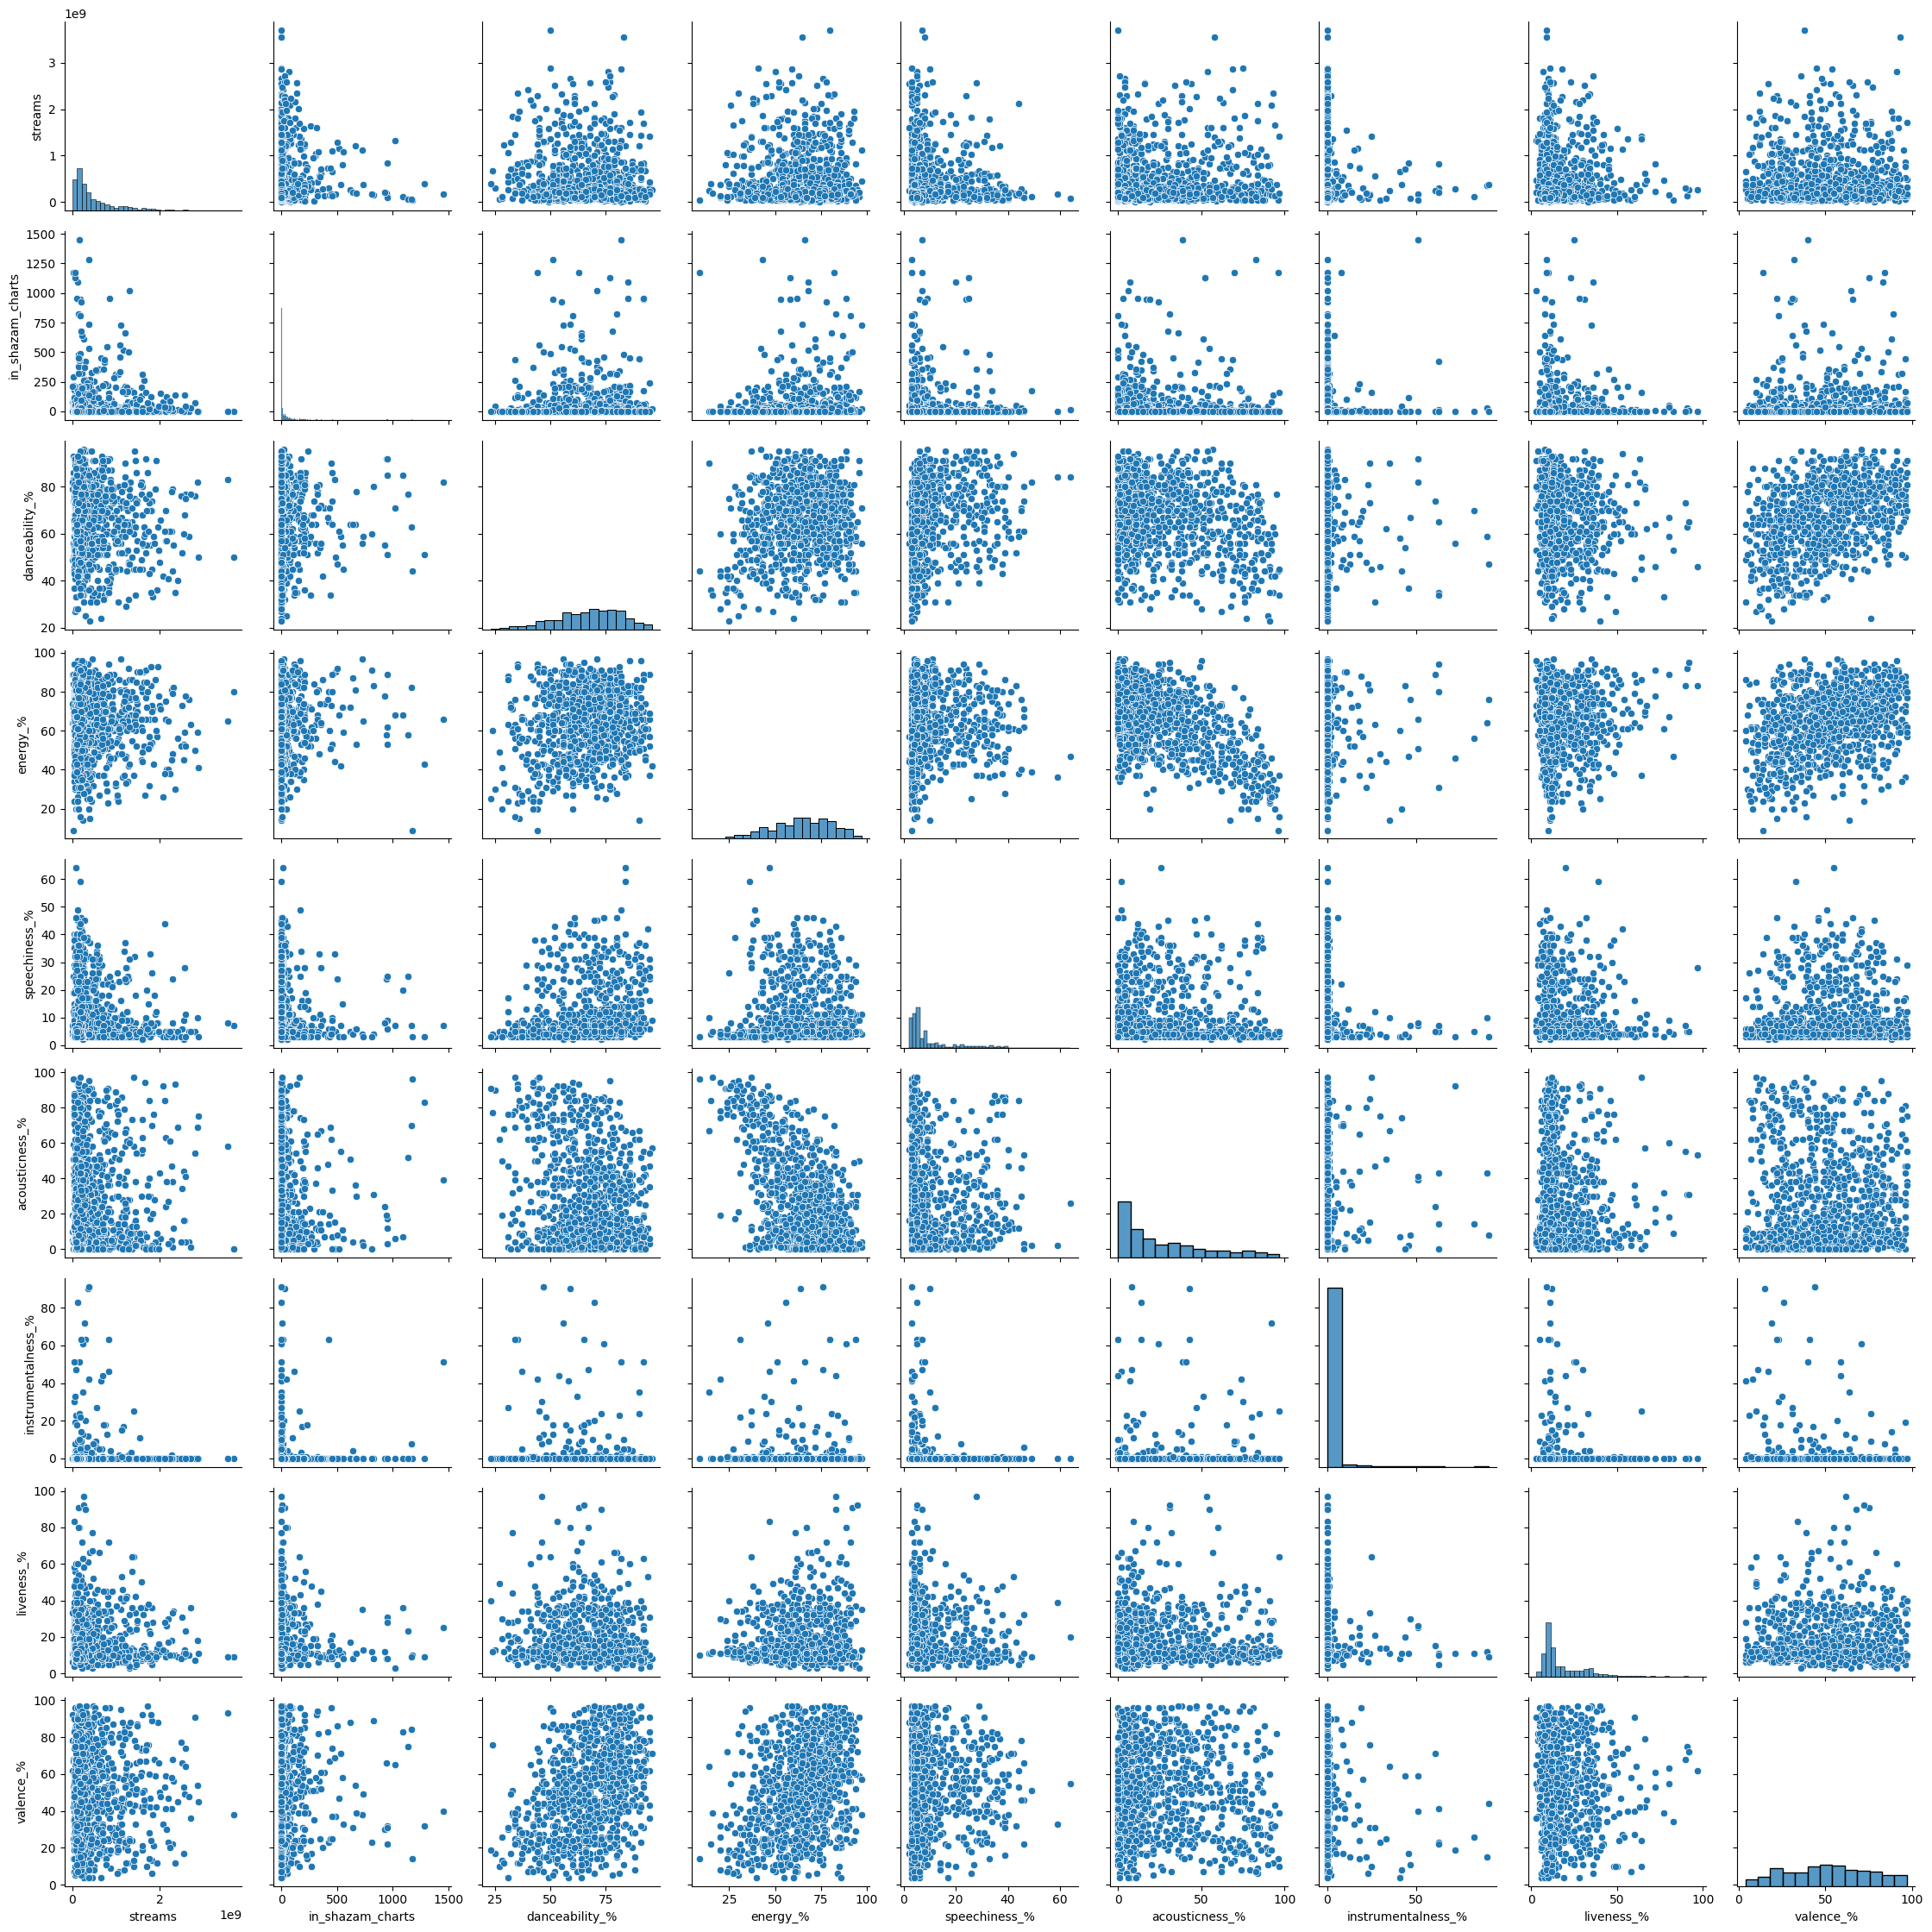

In [120]:
# plot the scatter plots for all numerical columns in the dataset, two plots per row
sns.pairplot(df[['streams', 'in_shazam_charts', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']])
# enhance the layout
plt.tight_layout()
plt.show()

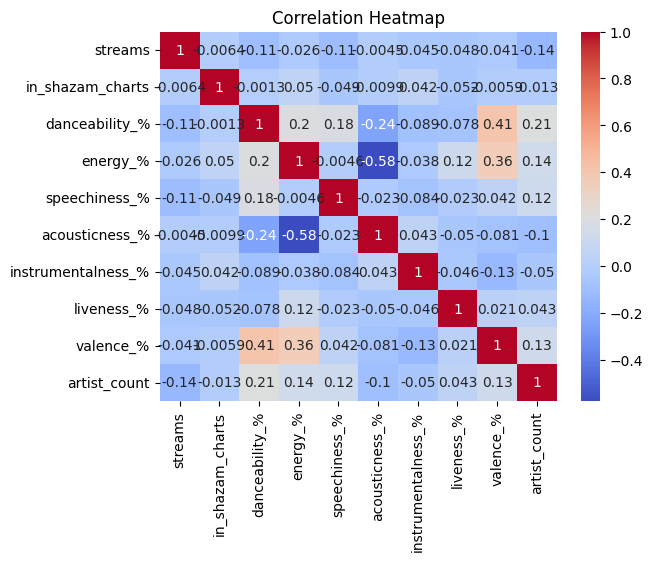

<Figure size 2000x1200 with 0 Axes>

In [134]:
# show a correlation heatmap for all numerical columns in the dataset
correlation = df[['streams', 'in_shazam_charts', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%', 'artist_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
#enhance figure size
plt.figure(figsize=(20,12))
plt.show()


In [158]:
# train a regression model to predict the 'streams' column
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Split the data into features and target variable
X = df
X = X.drop(columns=['streams', 'artist(s)_name', 'track_name', 'first_letter'])
y = df['streams']

# split the column 'mode' to three categorical columns: Minor, Major, Unknown and drop the original column
X = pd.get_dummies(X, columns=['mode'], drop_first=True)
X = pd.get_dummies(X, columns=['key'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse


7.037176700785537e+16

In [160]:
X

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_Unknown
0,2,2023,7,14,553,147,43,263,45,10,...,True,False,False,False,False,False,False,False,False,False
1,1,2023,3,23,1474,48,48,126,58,14,...,False,True,False,False,False,False,False,False,False,False
2,1,2023,6,30,1397,113,94,207,91,14,...,False,False,False,False,False,True,False,False,False,False
3,1,2019,8,23,7858,100,116,207,125,12,...,False,False,False,False,False,False,False,False,False,False
4,1,2023,5,18,3133,50,84,133,87,15,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,61,13,37,1,...,False,False,False,False,False,False,False,False,False,False
949,1,2022,10,21,1180,0,4,0,8,0,...,False,False,False,False,False,False,True,False,False,False
950,2,2022,11,3,573,0,2,0,7,0,...,False,True,False,False,False,False,False,False,False,False
951,3,2022,10,20,1320,0,29,26,17,0,...,False,True,False,False,False,False,False,False,False,False


In [164]:
# show the summary of the regression model
import statsmodels.api as sm
X = df
X = X.drop(columns=['streams', 'artist(s)_name', 'track_name', 'first_letter', 'key', 'mode'])
X = pd.to_numeric(X)
model = sm.OLS('streams ~ artist_count + released_year + released_month + released_day + in_spotify_playlists + in_spotify_charts + in_apple_playlists + in_apple_charts + in_deezer_playlists + in_deezer_charts + in_shazam_charts + bpm + danceability_% + valence_% + energy_% + acousticness_% + instrumentalness_% + liveness_% + speechiness_% + C(key) + C(mode)', data=df)
results = model.fit()
results.summery()


TypeError: arg must be a list, tuple, 1-d array, or Series

In [165]:
import pandas as pd
import statsmodels.api as sm

# Assuming X already contains the independent variables after dropping certain columns
X = df.drop(columns=['streams', 'artist(s)_name', 'track_name', 'first_letter'])

# Convert 'key' and 'mode' columns to categorical data type
X['key'] = X['key'].astype('category')
X['mode'] = X['mode'].astype('category')

# Fit the OLS model
model = sm.OLS(df['streams'], sm.add_constant(X))
results = model.fit()
print(results.summary())



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [166]:
# Check data types
print(X.dtypes)

# Inspect data
print(X.head())

artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists        int64
in_deezer_charts           int64
in_shazam_charts         float64
bpm                        int64
key                     category
mode                    category
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
dtype: object
   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019       